In [46]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

path_to_file = "../data/train.csv"
data = pd.read_csv(path_to_file)
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
cleanup_nums = {"LandSlope": {"Gtl": 3, "Mod": 2, "Sev": 1},
                
                "ExterQual": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1},
                
                "ExterCond": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
                
                "BsmtQual": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, np.nan: 1},
                
                "BsmtCond": {"Gd": 5, "TA": 4, "Fa": 3, "Po": 2, np.nan: 1},
                
                "BsmtExposure": {"Gd": 4, "Av": 3, "Mn": 2, "No": 2, np.nan: 1},
                
                "BsmtFinType1": {'GLQ':7, 'ALQ':6, 'Unf':2, 'Rec':4, 'BLQ':5, np.nan:1, 'LwQ':3},
                
                "BsmtFinType2": {'GLQ':7, 'ALQ':6, 'Unf':2, 'Rec':4, 'BLQ':5, np.nan:1, 'LwQ':3},
                
                "HeatingQC": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1},
                
                "KitchenQual": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1},
                
                "Functional": {'Typ':7, 'Min1':6, 'Maj1':3, 'Min2':5, 'Mod':4, 'Maj2':2, 'Sev':1},
                
                "FireplaceQu": {"Ex": 6, "Gd": 5, "TA": 4, "Fa": 3, "Po": 2, np.nan: 1},
                
                "GarageFinish": {'RFn': 3, 'Unf': 2, 'Fin': 4, np.nan: 1},
                
                "GarageQual": {"Ex": 6, "Gd": 5, "TA": 4, "Fa": 3, "Po": 2, np.nan: 1},
                
                "GarageCond": {"Ex": 6, "Gd": 5, "TA": 4, "Fa": 3, "Po": 2, np.nan: 1},
                
                "PavedDrive": {'Y':3, 'N':1, 'P':2},

               }

In [791]:
# make all ordinal columns into ordinal data
data.replace(cleanup_nums, inplace=True)

In [792]:
# function to dummify variables
def dummify(x):
    dummy = pd.DataFrame([])
    for i in x:
        #print(str(i.name))
        dummylist = pd.get_dummies(i, prefix = str(i.name), prefix_sep= '_')
        #j = dummylist[0]
        dummylist = dummylist.drop(str(i.name) + '_' + str(i[0]), axis = 1)   
        dummy = pd.concat([dummy, dummylist], axis =1)
    return dummy

In [793]:
# drop utilities and garage Yr built columns
data = data.drop(['Utilities'], axis=1)
data = data.drop(['GarageYrBlt'], axis=1)

In [6]:
data.isna().sum().sort_values(ascending = False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [794]:
# convert nominals that have meaningful NAs to "No"

nominal_na_list = ['GarageType','MasVnrType', 'LotFrontage', 'Fence', 'Electrical', 'MasVnrArea', 'Alley']

def nominal(x):
    for i in x:
        data[i].fillna("No",inplace=True)


nominal(nominal_na_list)

In [795]:
# make Shed 1, everything else zero. Make poolQC 1, everything else zero
data['MiscFeature'] = [1 if i == 'Shed' else 0 for i in data['MiscFeature']]
data['PoolQC'] = [1 if i in ['Ex', 'Fa', 'Gd']  else 0 for i in data['PoolQC']]
data['Alley'] = [0 if i =='No'  else 1 for i in data['Alley']]
data['CentralAir'] = [0 if i =='N'  else 1 for i in data['CentralAir']]
data['Street'] = [0 if i == "Grvl"  else 1 for i in data['Street']]
data['LotFrontage'] = [0 if i == "No"  else i for i in data['LotFrontage']]
data['MasVnrArea'] = [0 if i == "No"  else i for i in data['MasVnrArea']]

In [796]:
# missing data check
data.isnull().sum().sort_values(ascending = False).head(10)

SalePrice      0
Foundation     0
RoofMatl       0
Exterior1st    0
Exterior2nd    0
MasVnrType     0
MasVnrArea     0
ExterQual      0
ExterCond      0
BsmtQual       0
dtype: int64

In [797]:
# dummify variables

dummifyList = [data['MSSubClass'],
data['MSZoning'],
data['LotShape'],
data['LandContour'],
data['LotConfig'],
data['Neighborhood'],
data['Condition1'],
data['Condition2'],
data['BldgType'],
data['HouseStyle'],
data['RoofStyle'],
data['RoofMatl'],
data['Exterior1st'],
data['Exterior2nd'],
data['MasVnrType'],
data['Foundation'],
data['Heating'],
data['GarageType'],
data['SaleType'],
data['SaleCondition'],
data['Fence'],
data['Electrical']]

dummy = dummify(dummifyList)

In [798]:
# join dummies with data
withDummies = pd.concat([dummy, data], axis =1)

In [799]:
# drop variables that have been dummified

withDummies = withDummies.drop([
    'MSSubClass','MSZoning',
'LotShape',
'LandContour',
'LotConfig',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'Foundation',
'Heating',
'GarageType',
'SaleType',
'SaleCondition',
'Fence',
'Electrical'
], axis=1)

In [800]:
#Renaming MiscFeatures as "Shed" to convert to boolean
withDummies.rename(columns={'MiscFeature':'Shed'}, inplace=True)

#Renaming PoolArea as "Pool" to convert to boolean
withDummies.rename(columns={"PoolArea":"Pool"}, inplace=True)

withDummies.to_csv('withDummies.csv', index = False)

In [801]:
cols = withDummies.columns

In [802]:
#list(cols)


In [803]:
# Next Questions to answer:
# will we know what each dummy means?
# which ordinals should be dummies?
# which ordinals should be collapsed?
# outliers: plot sale price vs. gr liv area
# Recommend removing any houses with more than 4000 sq ft from the data set? 
# feature selection

In [804]:
# create dataset data2 with ordinals as dummies to test which is better
path_to_file = "../data/train.csv"
data2 = pd.read_csv(path_to_file)
data2 = data2.drop(['Utilities'], axis=1)
data2 = data2.drop(['GarageYrBlt'], axis=1)

# convert nominals that have meaningful NAs to "No"

nominal2_na_list = ['GarageType','MasVnrType', 'LotFrontage', 'Fence', 'Electrical', 'MasVnrArea', 'Alley']

def nominal2(x):
    for i in x:
        data2[i].fillna("No",inplace=True)


        
nominal2(nominal2_na_list)

data2['MiscFeature'] = [1 if i == 'Shed' else 0 for i in data2['MiscFeature']]
data2['PoolQC'] = [1 if i in ['Ex', 'Fa', 'Gd']  else 0 for i in data2['PoolQC']]
data2['Alley'] = [0 if i == 'No' else 1 for i in data2['Alley']]
data2['CentralAir'] = [0 if i =='N'  else 1 for i in data2['CentralAir']]
data2['Street'] = [0 if i == "Grvl"  else 1 for i in data2['Street']]
data2['LotFrontage'] = [0 if i == "No"  else i for i in data2['LotFrontage']]
# dummify variables

dummifyList2 = [data['MSSubClass'], data['MSZoning'], data['LotShape'],
               data['LandContour'], data['LotConfig'], data['Neighborhood'], data['Condition1'],
               data['Condition2'], data['BldgType'], data['HouseStyle'], data['RoofStyle'],
               data['RoofMatl'], data['Exterior1st'], data['Exterior2nd'], data['MasVnrType'], 
               data['Foundation'], data['Heating'], data['GarageType'], data['SaleType'], 
               data['SaleCondition'], data['Fence'], data['Electrical'],
                data["LandSlope"], 
                data["ExterQual"], 
                data["ExterCond"],
                data["BsmtQual"],
                data["BsmtCond"],
                data["BsmtExposure"],
                data["BsmtFinType1"],
                data["BsmtFinType2"],
                data["HeatingQC"],
                data["KitchenQual"],
                data["Functional"],
                data["FireplaceQu"],
                data["GarageFinish"],
                data["GarageQual"],
                data["GarageCond"],
                data["PavedDrive"]
               ]

dummy2 = dummify(dummifyList2)

# join dummies with data
withDummies2 = pd.concat([dummy2, data2], axis =1)

In [805]:
# drop variables that have been dummified
withDummies2 = withDummies2.drop([
    'MSSubClass','MSZoning',
'LotShape',
'LandContour',
'LotConfig',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'Foundation',
'Heating',
'GarageType',
'SaleType',
'SaleCondition',
'Fence',
'Electrical',
"LandSlope", 
"ExterQual", 
"ExterCond",
"BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinType2",
"HeatingQC",
"KitchenQual",
"Functional",
"FireplaceQu",
"GarageFinish",
"GarageQual",
"GarageCond",
"PavedDrive"
], axis=1)

In [806]:
#Renaming MiscFeatures as "Shed" to convert to boolean
withDummies2.rename(columns={'MiscFeature':'Shed'}, inplace=True)

#Renaming PoolArea as "Pool" to convert to boolean
withDummies2.rename(columns={"PoolArea":"Pool"}, inplace=True)

#withDummies2.to_csv('withDummies2.csv', index = False)

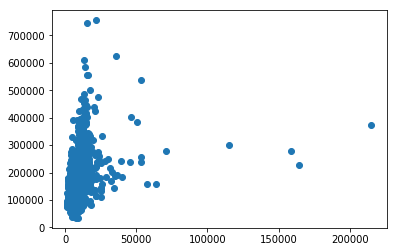

In [807]:
# we should drop these outliers
s1 = plt.scatter(y = withDummies.SalePrice, x= withDummies.LotArea, label='Price x Area')

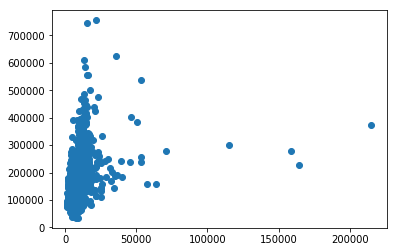

In [808]:
s1 = plt.scatter(y = withDummies.SalePrice, x= withDummies.LotArea, label='Price x Area')

In [809]:
from collections import Counter
print(Counter(data['Alley']).keys())
print(Counter(data['Alley']).values())

dict_keys([0, 1])
dict_values([1369, 91])


In [810]:
print(Counter(data['Alley']).keys())
print(Counter(data['MiscFeature']).values())

dict_keys([0, 1])
dict_values([1411, 49])


In [811]:
data.Alley.unique()

array([0, 1])

In [812]:
data.groupby('PoolArea').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
PoolArea,,,,,,,,,,,,,,,,,,,,,
0,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,...,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453
480,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
512,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
519,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
555,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
576,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
648,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
738,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [813]:
data.groupby('Fence').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Fence,,,,,,,,,,,,,,,,,,,,,
GdPrv,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
GdWo,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
MnPrv,157,157,157,157,157,157,157,157,157,157,...,157,157,157,157,157,157,157,157,157,157
MnWw,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
No,1179,1179,1179,1179,1179,1179,1179,1179,1179,1179,...,1179,1179,1179,1179,1179,1179,1179,1179,1179,1179


In [814]:
# test = data[['MSZoning', 'LotFrontage']]
# test["LotFrontage"] = test['LotFrontage'].isnull()
# test['LotFrontage'] = [1 if i== True else 0 for i in test['LotFrontage']]
# #test = test[test.LotFrontage.isnull()]
# test

In [815]:
test.groupby('MSZoning').sum()

,LotFrontage
MSZoning,
C (all),0
FV,8
RH,3
RL,229
RM,19


In [816]:
test2 = data[data.MasVnrArea.isnull()]

In [817]:
test2.MasVnrType

Series([], Name: MasVnrType, dtype: object)

In [7]:
data.groupby('KitchenQual').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
KitchenQual,,,,,,,,,,,,,,,,,,,,,
Ex,100,100,100,94,100,100,3,100,100,100,...,100,2,8,0,100,100,100,100,100,100
Fa,39,39,39,35,39,39,6,39,39,39,...,39,0,7,4,39,39,39,39,39,39
Gd,586,586,586,471,586,586,34,586,586,586,...,586,4,73,12,586,586,586,586,586,586
TA,735,735,735,601,735,735,48,735,735,735,...,735,1,193,38,735,735,735,735,735,735


In [11]:
data.KitchenQual.isnull().sum()

0

In [10]:
from collections import Counter
print(Counter(data.Alley).keys())
print(Counter(data.Alley).values())

dict_keys([nan, 'Grvl', 'Pave'])
dict_values([1369, 50, 41])


In [ ]:
import numpy
print numpy.corrcoef(a,b)

In [23]:
np.corrcoef(data.SalePrice, data.Alley)

AttributeError: 'float' object has no attribute 'shape'

NameError: name 'corr' is not defined

In [49]:
data.Alley[data.Alley == 'Grvl'] = 1
data.Alley[data.Alley == 'Pave'] = 2
data.Alley = data.Alley.fillna(0)

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,0,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,0,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,0,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,0,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,0,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [35]:
data.Alley = data.Alley.fillna(0)

In [51]:
alls = data[['Alley','SalePrice']]
alls.corr()

,Alley,SalePrice
Alley,1.000000,-0.092607
SalePrice,-0.092607,1.000000


In [52]:
data1= data

In [53]:
data1.Alley[data1.Alley == 2] = 1

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
jw = data1[['Alley','SalePrice']]
jw.corr()

,Alley,SalePrice
Alley,1.000000,-0.123611
SalePrice,-0.123611,1.000000


In [45]:
data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,0,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,0,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,0,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,0,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,0,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
